# Matplotlib Cyclers are Great

Every now and then I come across a nifty feature in Matplotlib that I wish I'd known about earlier. The MPL documentation can be a beast to get through, and as a result you miss some cool stuff sometimes.

This is a quick demo of one such feature: the **cycler**.

Have you ever had to loop through a number of plotting parameters in matplotlib? Say you have two datasets and you'd like to compare them to one another. Maybe something like this:

Setting up low-pass filter at 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 165 samples (1.650 sec)



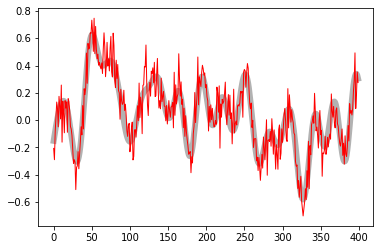

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import mne
%matplotlib inline

# Create fake data
data1 = np.random.randn(500)
data1 = mne.filter.filter_data(data1, 100, None, 3)
data2 = data1 + np.random.randn(500) * .1

# Plot
linewidths = [6, 1]
colors = ['k', 'r']
alphas = [.3, 1]
fig, ax = plt.subplots()
for i_data, color, lw, alpha in zip([data1, data2], colors, linewidths, alphas):
    ax.plot(i_data[50:450], c=color, lw=lw, alpha=alpha)

There's really a lot of unnecessary code going on above. We're defining objects that share the same name as the kwarg that they represent. We can't store them as dictionaries, because then we'd have to do some python-fu in order to get them to iterate properly. This is where `cycler` is handy:

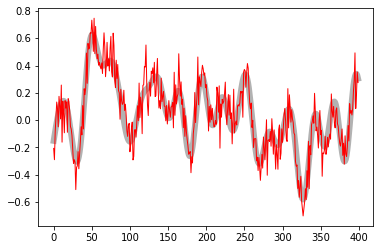

In [6]:
# Plot the same thing, but now it's more readable and compact
cycler = plt.cycler(lw=[6, 1], c=['k', 'r'], alpha=[.3, 1])
fig, ax = plt.subplots()
for i_data, kwargs in zip([data1, data2], cycler):
    ax.plot(i_data[50:450], **kwargs)

You can even cycle through more complex properties like colormaps. Let's create one that cycles through several colormaps for a plot:

In [7]:
cyc = plt.cycler(s=np.linspace(200, 50, 3),
                 cmap=['viridis', 'magma', 'coolwarm'],
                 alpha=[.25, .5, .75],
                 lw=[0, .1, .5])

# You can print the cycler, or use nice jupyter notebook support
print(cyc)
cyc

(((cycler('s', [200.0, 125.0, 50.0]) + cycler('cmap', ['viridis', 'magma', 'coolwarm'])) + cycler('alpha', [0.25, 0.5, 0.75])) + cycler('lw', [0, 0.1, 0.5]))


0.25,'viridis',0,200.0
0.5,'magma',0.1,125.0
0.75,'coolwarm',0.5,50.0


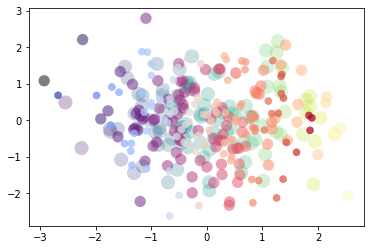

In [8]:
fig, ax = plt.subplots()
for args in cyc:
    x, y = np.random.randn(2, 100)
    ax.scatter(x, y, c=x, **args)

So there you have it - cyclers are pretty neat. Give them a shot, and buy a `matplotlib` dev a beer next time you see them for making such an awesome and often under-appreciated package!

:::{tip}
You can check out the MPL cycler page [here](http://matplotlib.org/cycler/)
:::